In [37]:
import pandas as pd
import numpy as np
import os

vdjdb= pd.read_csv('/Users/shalomifernandes/Desktop/UOB/TB2/DSMP/vdjdb.csv')

In [38]:
vdjdb

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


In [39]:
print(vdjdb.columns)

Index(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a',
       'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'],
      dtype='object')


In [40]:
# Analyze the dataset for key insights

# Distribution of genes (TRA vs TRB)
gene_distribution = vdjdb['gene'].value_counts()

# Species distribution
species_distribution = vdjdb['species'].value_counts()

# MHC class distribution
mhc_class_distribution = vdjdb['mhc.class'].value_counts()

# Diversity of antigens recognized
antigen_epitope_diversity = vdjdb['antigen.epitope'].nunique()

# Prepare a summary of the findings
summary = {
    "Gene Distribution": gene_distribution,
    "Species Distribution": species_distribution,
    "MHC Class Distribution": mhc_class_distribution,
    "Unique Antigen Epitopes": antigen_epitope_diversity
}

summary


{'Gene Distribution': gene
 TRB    54722
 TRA    38049
 Name: count, dtype: int64,
 'Species Distribution': species
 HomoSapiens      85329
 MusMusculus       5323
 MacacaMulatta     2119
 Name: count, dtype: int64,
 'MHC Class Distribution': mhc.class
 MHCI     88368
 MHCII     4403
 Name: count, dtype: int64,
 'Unique Antigen Epitopes': 1169}

#Bar Graph to visualize Gene distribution

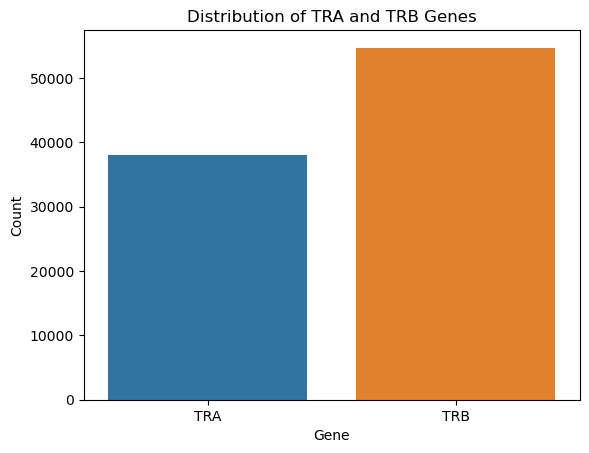

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gene distribution
sns.countplot(x='gene', data=vdjdb)
plt.title('Distribution of TRA and TRB Genes')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.show()

The dataset contains a total of 92,771 T-cell receptor sequences, with a majority being of the TRB gene (54,722 sequences) compared to TRA gene sequences (38,049 sequences). This indicates a higher representation of T-cell receptor beta chains in this dataset.

#Donut plot to visualize the Species Distribution

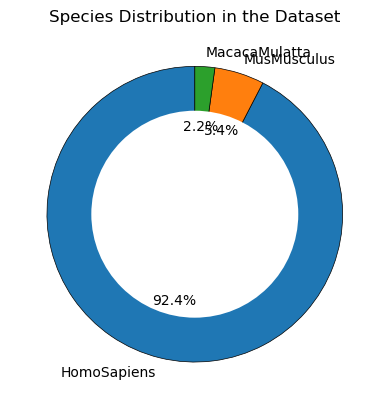

In [42]:
import matplotlib.pyplot as plt

# Sample data for species distribution
species_counts = {'HomoSapiens': 85000, 'MusMusculus': 5000, 'MacacaMulatta': 2000}

# Creating the donut chart
fig, ax = plt.subplots()
ax.pie(species_counts.values(), labels=species_counts.keys(), autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Species Distribution in the Dataset')
plt.show()


The majority of sequences are derived from Homo sapiens (85,329 sequences), followed by Mus musculus (5,323 sequences), and Macaca mulatta (2,119 sequences), showcasing a strong focus on human TCR sequences, with some representation from mouse and macaque for comparative immunology or model studies.

#Pie Chart to visualize MHC Class Distribution

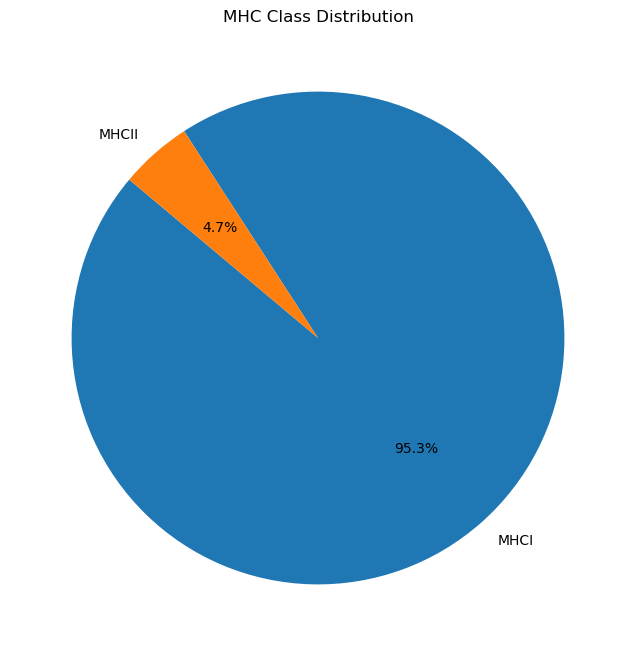

In [43]:
# MHC class distribution
%matplotlib inline
mhc_class_counts = vdjdb['mhc.class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mhc_class_counts, labels=mhc_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('MHC Class Distribution')
plt.show()

The interactions primarily involve class I MHC molecules (MHCI), with 88,368 instances, compared to 4,403 instances involving class II MHC molecules (MHCII). This highlights a predominant focus on CD8+ T-cell responses, which are typically restricted by MHCI molecules.

#Heatmap to show V and J Gene Usage

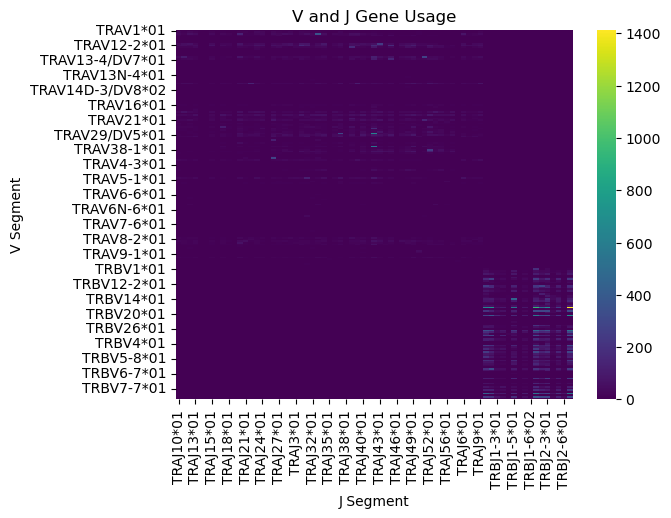

In [44]:
# Heatmap of V and J gene usage
vj_usage = pd.crosstab(vdjdb['v.segm'], vdjdb['j.segm'])
sns.heatmap(vj_usage, cmap='viridis')
plt.title('V and J Gene Usage')
plt.xlabel('J Segment')
plt.ylabel('V Segment')
plt.show()

The heatmap indicates the frequencies or count of each V-J gene segment combination. For example, a dark purple area might indicate a low frequency, while a bright green area might indicate a high frequency of occurrences.

#Network Graph to show Association Between TCR Sequences and Antigen Epitopes 

In [45]:
'''import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes and edges based on TCR sequences and antigen epitopes
for index, row in vdjdb.iterrows():
    G.add_node(row['cdr3'], type='TCR')
    G.add_node(row['antigen.epitope'], type='Antigen')
    G.add_edge(row['cdr3'], row['antigen.epitope'])

# Draw the graph
plt.figure(figsize=(7, 7))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue', label='TCR', alpha=0.7)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightgreen', label='Antigen', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('TCR Sequences and Antigen Epitopes Association')
plt.legend()
plt.show()'''

"import networkx as nx\n\n# Create a graph\nG = nx.Graph()\n\n# Add nodes and edges based on TCR sequences and antigen epitopes\nfor index, row in vdjdb.iterrows():\n    G.add_node(row['cdr3'], type='TCR')\n    G.add_node(row['antigen.epitope'], type='Antigen')\n    G.add_edge(row['cdr3'], row['antigen.epitope'])\n\n# Draw the graph\nplt.figure(figsize=(7, 7))\npos = nx.spring_layout(G, k=0.15)\nnx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue', label='TCR', alpha=0.7)\nnx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightgreen', label='Antigen', alpha=0.7)\nnx.draw_networkx_edges(G, pos, alpha=0.5)\nplt.title('TCR Sequences and Antigen Epitopes Association')\nplt.legend()\nplt.show()"

In [46]:
# Display a summary of the dataset
print(vdjdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [47]:
print(vdjdb.describe())

         complex.id   vdjdb.score
count  92771.000000  92771.000000
mean   10089.612379      0.196699
std    10197.643859      0.567001
min        0.000000      0.000000
25%        0.000000      0.000000
50%     7402.000000      0.000000
75%    18998.000000      0.000000
max    30594.000000      3.000000


In [48]:
# Displaying the first few rows of the dataset
print(vdjdb.head())

   complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2           0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   
3           2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4           2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   

       species     mhc.a mhc.b mhc.class antigen.epitope  ... antigen.species  \
0  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   
1  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   
2  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   
3  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   
4  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   

    reference.id                                             method  \
0  PMID:15596521  {"frequen

#pre-processing

In [49]:
#Creating a copy of the original vdjdb dataset for modifications
filtered_data = vdjdb.copy()

In [50]:
# Assuming the dataset is already loaded into the variable `vdjdb`

# Filter the dataset to keep relevant columns
filtered_data = vdjdb[['complex.id','gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope']]
print(filtered_data)

       complex.id gene                  cdr3       v.segm      j.segm  \
0               1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1               1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2               0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   
3               2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4               2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   
...           ...  ...                   ...          ...         ...   
92766       30592  TRB       CASSPGQGGDNEQFF   TRBV7-3*01  TRBJ2-1*01   
92767       30593  TRA          CAPQGATNKLIF  TRAV12-2*01   TRAJ32*01   
92768       30593  TRB       CASSLGAGGQETQYF   TRBV5-1*01  TRBJ2-5*01   
92769       30594  TRA        CLVGGSGGYNKLIF     TRAV4*01    TRAJ4*01   
92770       30594  TRB         CASSSTAQETQYF  TRBV11-2*01  TRBJ2-5*01   

           species           mhc.a           mhc.b mhc.class antigen.epitope  
0      HomoSapiens        HLA-B*08          

In [51]:
filtered_data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP


We will check for null or missing values and clean the data accordingly

In [52]:
# Check for missing values in each column
missing_values = filtered_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
dtype: int64


In [53]:
# Drop rows with any missing values
filtered_data.dropna(subset=['v.segm','j.segm'], inplace=True)

/var/folders/58/r8zg_wfn5mg5xzz6wjcrr52w0000gn/T/ipykernel_7751/885145127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['v.segm','j.segm'], inplace=True)


In [54]:
# Check for missing values in each column
cleaned_data = filtered_data.isnull().sum()
cleaned_data

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
dtype: int64

We will check if there are any duplicates in the data. If there are we will filter them out to avoid data redundancy

In [55]:
# Check for duplicate rows
duplicates = filtered_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 4326


In [56]:
# Dropping all duplicate rows
filtered_data.drop_duplicates(inplace=True)

/var/folders/58/r8zg_wfn5mg5xzz6wjcrr52w0000gn/T/ipykernel_7751/561182336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop_duplicates(inplace=True)


In [57]:
# Checking for duplicate rows
duplicates = filtered_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [58]:
filtered_data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP


#Feature Engineering

We will now create a new column called cdr3_length which we will be using for further analysis as it can be helpful for correlation with binding affinities.

In [59]:
#checking the type of the cdr3 column
print(type(filtered_data['cdr3']))

<class 'pandas.core.series.Series'>


In [60]:
filtered_data['cdr3']

0               CIVRAPGRADMRF
1        CASSYLPGQGDHYSNQPQHF
2         CASSFEAGQGFFSNQPQHF
3              CAVPSGAGSYQLTF
4         CASSFEPGQGFYSNQPQHF
                 ...         
92766         CASSPGQGGDNEQFF
92767            CAPQGATNKLIF
92768         CASSLGAGGQETQYF
92769          CLVGGSGGYNKLIF
92770           CASSSTAQETQYF
Name: cdr3, Length: 87286, dtype: object

In [61]:
#creation of cdr3_length column
filtered_data.loc[:, 'cdr3_length'] = filtered_data['cdr3'].apply(len)

/var/folders/58/r8zg_wfn5mg5xzz6wjcrr52w0000gn/T/ipykernel_7751/2711337227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'cdr3_length'] = filtered_data['cdr3'].apply(len)


In [62]:
filtered_data['cdr3_length']

0        13
1        20
2        19
3        14
4        19
         ..
92766    15
92767    12
92768    15
92769    14
92770    13
Name: cdr3_length, Length: 87286, dtype: int64

In [63]:
# Displaying the first few rows of the dataset
print(filtered_data.head())

   complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2           0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   
3           2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4           2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   

       species     mhc.a mhc.b mhc.class antigen.epitope  cdr3_length  
0  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL           13  
1  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL           20  
2  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL           19  
3  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL           14  
4  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL           19  


Creating new dataframes cdr3_alpha containing the alpha chains, cdr3_beta containing the beta chains and then a dataframe having combined alpha and beta chains for further analysis

In [64]:
# Creating two new DataFrames based on the 'gene' column values
cdr3_alpha_df = filtered_data[filtered_data['gene'] == 'TRA'].copy()
cdr3_beta_df = filtered_data[filtered_data['gene'] == 'TRB'].copy()

# Now you have:
# cdr3_alpha_df: containing rows where 'gene' is 'TRA'
# cdr3_beta_df: containing rows where 'gene' is 'TRB'

# You can inspect the first few rows of each DataFrame to ensure it's what you expected
print("Alpha Chains:")
print(cdr3_alpha_df.head())

print("\nBeta Chains:")
print(cdr3_beta_df.head())

Alpha Chains:
    complex.id gene            cdr3           v.segm     j.segm      species  \
0            1  TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
3            2  TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
7            4  TRA   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
9            5  TRA   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
12           6  TRA  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   

       mhc.a mhc.b mhc.class antigen.epitope  cdr3_length  
0   HLA-B*08   B2M      MHCI        FLKEKGGL           13  
3   HLA-B*08   B2M      MHCI        FLKEKGGL           14  
7   HLA-B*08   B2M      MHCI        FLKEKGGL           13  
9   HLA-B*08   B2M      MHCI        FLKEQGGL           13  
12  HLA-B*08   B2M      MHCI        FLKEQGGL           14  

Beta Chains:
   complex.id gene                  cdr3     v.segm      j.segm      species  \
1           1  TRB  CASSYLPGQGDHYSNQPQHF  TRBV13*01

In [65]:
filtered_data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,cdr3_length
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,13
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,20
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,19
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,14
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,19
...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,15
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,12
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,15
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,14


In [66]:
#Dropping column cdr3_length
cdr3_alpha_beta_df = filtered_data.drop(columns=['cdr3_length'])

In [67]:
# Dropping rows where 'complex.id' is 0
cdr3_alpha_beta_df = cdr3_alpha_beta_df[cdr3_alpha_beta_df['complex.id'] != 0]

In [68]:
cdr3_alpha_beta_df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL
...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP


We will now merge alpha & beta chain and store it in the same dataframe named cdr3_alpha_beta_df

In [69]:
'''cdr3_alpha_df = cdr3_alpha_df.sort_values(by='complex.id').reset_index(drop=True)
cdr3_beta_df = cdr3_beta_df.sort_values(by='complex.id').reset_index(drop=True)

# Merge the alpha and beta DataFrames based on their 'complex.id'
# It's crucial to have a common key or index to merge on
cdr3_alpha_beta_df = pd.merge(cdr3_alpha_df, cdr3_beta_df, on='complex.id', suffixes=('_a', '_b'))

# Now, cdr3_alpha_beta_df contains the combined information for alpha and beta chains
# We can drop the duplicate 'complex.id' column from the beta dataframe
cdr3_alpha_beta_df.drop(columns=['complex.id_b'], inplace=True)

# Optionally, you may also want to rename 'complex.id_a' to just 'complex.id'
cdr3_alpha_beta_df.rename(columns={'complex.id_a': 'complex.id'}, inplace=True)'''


"cdr3_alpha_df = cdr3_alpha_df.sort_values(by='complex.id').reset_index(drop=True)\ncdr3_beta_df = cdr3_beta_df.sort_values(by='complex.id').reset_index(drop=True)\n\n# Merge the alpha and beta DataFrames based on their 'complex.id'\n# It's crucial to have a common key or index to merge on\ncdr3_alpha_beta_df = pd.merge(cdr3_alpha_df, cdr3_beta_df, on='complex.id', suffixes=('_a', '_b'))\n\n# Now, cdr3_alpha_beta_df contains the combined information for alpha and beta chains\n# We can drop the duplicate 'complex.id' column from the beta dataframe\ncdr3_alpha_beta_df.drop(columns=['complex.id_b'], inplace=True)\n\n# Optionally, you may also want to rename 'complex.id_a' to just 'complex.id'\ncdr3_alpha_beta_df.rename(columns={'complex.id_a': 'complex.id'}, inplace=True)"

In [70]:
# Extract alpha chains into a separate DataFrame and rename the columns
cdr3_alpha_df = cdr3_alpha_df.rename(columns={
    'cdr3': 'cdr3_a', 'v.segm': 'v.segm_a', 'j.segm': 'j.segm_a'
}).drop('gene', axis=1)

# Extract beta chains into a separate DataFrame and rename the columns
cdr3_beta_df = cdr3_beta_df.rename(columns={
    'cdr3': 'cdr3_b', 'v.segm': 'v.segm_b', 'j.segm': 'j.segm_b'
}).drop('gene', axis=1)

In [71]:
# Merge the alpha and beta DataFrames on 'complex.id'
cdr3_alpha_beta_df = pd.merge(cdr3_alpha_df, cdr3_beta_df, on='complex.id', how='inner')

# Select only the required columns
cdr3_alpha_beta_df = ['complex.id', 'cdr3_a', 'cdr3_b', 'v.segm_a', 'v.segm_b', 'j.segm_a', 'j.segm_b', 'species', 'antigen.epitope']

In [72]:
cdr3_alpha_beta_df.head()

AttributeError: 'list' object has no attribute 'head'

In [ ]:
#performing one hot encoding

In [ ]:
def one_hot_encode_cdr3(cdr3_sequence, max_length=20):
    # Define a mapping for each amino acid to an integer
    amino_acid_mapping = {aa: i for i, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}
    
    # Initialize the one-hot encoded matrix with zeros
    # The shape will be the length of the CDR3 sequence by the number of unique amino acids
    one_hot_matrix = np.zeros((max_length, len(amino_acid_mapping)))
    
    # Fill in the one-hot encoded matrix
    for position, amino_acid in enumerate(cdr3_sequence):
        if position < max_length:
            # Set the column corresponding to the amino acid to 1
            amino_acid_index = amino_acid_mapping.get(amino_acid)
            if amino_acid_index is not None:  # Check if the amino acid is in the mapping
                one_hot_matrix[position, amino_acid_index] = 1
        else:
            # If the sequence is longer than the max length, stop encoding
            break
            
    return one_hot_matrix

# Example usage:
# Define a CDR3 sequence
cdr3_sequence_example = 'CASSLGTQYIY'

# One-hot encode the sequence
encoded_sequence = one_hot_encode_cdr3(cdr3_sequence_example)

# The `encoded_sequence` is now a NumPy array representing the one-hot encoded CDR3 sequence

In [ ]:
encoded_sequence

In [ ]:
from Bio.Align import substitution_matrices
import pandas as pd
import numpy as np

def load_blosum_matrix(matrix_name):
    # Load the matrix using Biopython
    blosum = substitution_matrices.load(matrix_name)
    amino_acids = sorted(set(k[0] for k in blosum.keys()).union(set(k[1] for k in blosum.keys())))

    # Create a DataFrame to hold the matrix
    aa_df = pd.DataFrame(index=amino_acids, columns=amino_acids, dtype=int)
    for (aa1, aa2), score in blosum.items():
        aa_df.at[aa1, aa2] = score
        aa_df.at[aa2, aa1] = score  # Ensure symmetry
    
    # Filter for standard amino acids, excluding B, J, O, U, X, and Z which are not standard
    standard_protein_letters = "ACDEFGHIKLMNPQRSTVWY"
    aa_df = aa_df.loc[list(standard_protein_letters), list(standard_protein_letters)]

    # Add NULL '-' with max loss (min value) & median for match
    aa_df.loc['-', :] = aa_df.values.min()
    aa_df.loc[:, '-'] = aa_df.values.min()
    aa_df.loc['-', '-'] = np.median(aa_df.values.diagonal())

    return aa_df

# Example usage:
blosum62_df = load_blosum_matrix("BLOSUM62")
blosum90_df = load_blosum_matrix("BLOSUM90")

# Now blosum62_df and blosum90_df are pandas DataFrames containing the BLOSUM62 and BLOSUM90 matrices, respectively.


In [ ]:
blosum62_df

In [ ]:
blosum90_df

Comparing the performances for the 3 types of encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example target variable 'y'
y = filtered_data['antigen.epitope']

# Prepare encoded features using the defined encoding functions
one_hot_features = np.array([one_hot_encode_cdr3(seq).flatten() for seq in filtered_data['cdr3']])
blosum62_features = np.array([one_hot_encode_blosum(seq, blosum62_random).flatten() for seq in filtered_data['cdr3']])
blosum90_features = np.array([one_hot_encode_blosum(seq, blosum90_random).flatten() for seq in filtered_data['cdr3']])

# Split data for each encoding strategy
X_train_one_hot, X_test_one_hot, y_train, y_test = train_test_split(one_hot_features, y, test_size=0.2, random_state=42)
X_train_blosum62, X_test_blosum62, _, _ = train_test_split(blosum62_features, y, test_size=0.2, random_state=42)
X_train_blosum90, X_test_blosum90, _, _ = train_test_split(blosum90_features, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)

# Train and evaluate the model for each encoding
accuracy_one_hot = train_and_evaluate(X_train_one_hot, X_test_one_hot, y_train, y_test)
accuracy_blosum62 = train_and_evaluate(X_train_blosum62, X_test_blosum62, y_train, y_test)
accuracy_blosum90 = train_and_evaluate(X_train_blosum90, X_test_blosum90, y_train, y_test)

# Print the accuracies for comparison
print(f"One-hot Encoding Accuracy: {accuracy_one_hot}")
print(f"BLOSUM62 Encoding Accuracy: {accuracy_blosum62}")
print(f"BLOSUM90 Encoding Accuracy: {accuracy_blosum90}")


Checking for the imbalances in the data so that we can handle them for better further analysis

In [ ]:
import pandas as pd
import numpy as np

epitope_num=filtered_data['antigen.epitope'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.pie(epitope_num)
plt.show()

In [ ]:
plt.bar(range(len(epitope_num)), epitope_num, color='skyblue')
plt.yscale('log')  # Continue using a logarithmic scale
plt.ylabel('Number of Entries (log scale)')
plt.title('Distribution of Entries by Type (Log Scale)')

In [ ]:
cumulative_percentage = np.cumsum(epitope_num) / epitope_num.sum()
plt.plot(cumulative_percentage, color='green')
plt.xlabel('Number of Types (Ranked)')
plt.ylabel('Cumulative Percentage of Entries')
plt.title('Cumulative Percentage of Entries by Type')

plt.tight_layout()
plt.show()

We will now use the encoded data (one-hot, BLOSUM62, BLOSUM90) to estimate a distance or similarity matrix. We will consider TCRDist and Giana to do the same

Performing ordinal encoding to calculate TCRdist

In [ ]:
import numpy as np
def seqs2mat(seqs, alphabet='IRQCYMLVAFNESHKWGDTP', max_len=None):
    if max_len is None:
        max_len = np.max([len(s) for s in seqs])
    mat = -1 * np.ones((len(seqs), max_len), dtype=np.int8)
    L = np.zeros(len(seqs), dtype=np.int8)
    for si, s in enumerate(seqs):
        L[si] = len(s)
        for aai in range(max_len):
            if aai >= len(s):
                break
            mat[si, aai] = alphabet.index(s[aai])
    return mat, L

In [ ]:
import numpy as np
import itertools
from Bio.Align import substitution_matrices
import pandas as pd
import numba as nb
#from encoders.ordinal_encode import seqs2mat


def distance_cal(seq_list,length_list,alphabet='IRQCYMLVAFNESHKWGDTP'):
    tcr_dict_distance_matrix = {('A', 'A'): 0, ('A', 'C'): 4, ('A', 'D'): 4, ('A', 'E'): 4, ('A', 'F'): 4,
                                ('A', 'G'): 4, ('A', 'H'): 4, ('A', 'I'): 4, ('A', 'K'): 4, ('A', 'L'): 4,
                                ('A', 'M'): 4, ('A', 'N'): 4, ('A', 'P'): 4, ('A', 'Q'): 4, ('A', 'R'): 4,
                                ('A', 'S'): 3, ('A', 'T'): 4, ('A', 'V'): 4, ('A', 'W'): 4, ('A', 'Y'): 4,
                                ('C', 'A'): 4, ('C', 'C'): 0, ('C', 'D'): 4, ('C', 'E'): 4, ('C', 'F'): 4,
                                ('C', 'G'): 4, ('C', 'H'): 4, ('C', 'I'): 4, ('C', 'K'): 4, ('C', 'L'): 4,
                                ('C', 'M'): 4, ('C', 'N'): 4, ('C', 'P'): 4, ('C', 'Q'): 4, ('C', 'R'): 4,
                                ('C', 'S'): 4, ('C', 'T'): 4, ('C', 'V'): 4, ('C', 'W'): 4, ('C', 'Y'): 4,
                                ('D', 'A'): 4, ('D', 'C'): 4, ('D', 'D'): 0, ('D', 'E'): 2, ('D', 'F'): 4,
                                ('D', 'G'): 4, ('D', 'H'): 4, ('D', 'I'): 4, ('D', 'K'): 4, ('D', 'L'): 4,
                                ('D', 'M'): 4, ('D', 'N'): 3, ('D', 'P'): 4, ('D', 'Q'): 4, ('D', 'R'): 4,
                                ('D', 'S'): 4, ('D', 'T'): 4, ('D', 'V'): 4, ('D', 'W'): 4, ('D', 'Y'): 4,
                                ('E', 'A'): 4, ('E', 'C'): 4, ('E', 'D'): 2, ('E', 'E'): 0, ('E', 'F'): 4,
                                ('E', 'G'): 4, ('E', 'H'): 4, ('E', 'I'): 4, ('E', 'K'): 3, ('E', 'L'): 4,
                                ('E', 'M'): 4, ('E', 'N'): 4, ('E', 'P'): 4, ('E', 'Q'): 2, ('E', 'R'): 4,
                                ('E', 'S'): 4, ('E', 'T'): 4, ('E', 'V'): 4, ('E', 'W'): 4, ('E', 'Y'): 4,
                                ('F', 'A'): 4, ('F', 'C'): 4, ('F', 'D'): 4, ('F', 'E'): 4, ('F', 'F'): 0,
                                ('F', 'G'): 4, ('F', 'H'): 4, ('F', 'I'): 4, ('F', 'K'): 4, ('F', 'L'): 4,
                                ('F', 'M'): 4, ('F', 'N'): 4, ('F', 'P'): 4, ('F', 'Q'): 4, ('F', 'R'): 4,
                                ('F', 'S'): 4, ('F', 'T'): 4, ('F', 'V'): 4, ('F', 'W'): 3, ('F', 'Y'): 1,
                                ('G', 'A'): 4, ('G', 'C'): 4, ('G', 'D'): 4, ('G', 'E'): 4, ('G', 'F'): 4,
                                ('G', 'G'): 0, ('G', 'H'): 4, ('G', 'I'): 4, ('G', 'K'): 4, ('G', 'L'): 4,
                                ('G', 'M'): 4, ('G', 'N'): 4, ('G', 'P'): 4, ('G', 'Q'): 4, ('G', 'R'): 4,
                                ('G', 'S'): 4, ('G', 'T'): 4, ('G', 'V'): 4, ('G', 'W'): 4, ('G', 'Y'): 4,
                                ('H', 'A'): 4, ('H', 'C'): 4, ('H', 'D'): 4, ('H', 'E'): 4, ('H', 'F'): 4,
                                ('H', 'G'): 4, ('H', 'H'): 0, ('H', 'I'): 4, ('H', 'K'): 4, ('H', 'L'): 4,
                                ('H', 'M'): 4, ('H', 'N'): 3, ('H', 'P'): 4, ('H', 'Q'): 4, ('H', 'R'): 4,
                                ('H', 'S'): 4, ('H', 'T'): 4, ('H', 'V'): 4, ('H', 'W'): 4, ('H', 'Y'): 2,
                                ('I', 'A'): 4, ('I', 'C'): 4, ('I', 'D'): 4, ('I', 'E'): 4, ('I', 'F'): 4,
                                ('I', 'G'): 4, ('I', 'H'): 4, ('I', 'I'): 0, ('I', 'K'): 4, ('I', 'L'): 2,
                                ('I', 'M'): 3, ('I', 'N'): 4, ('I', 'P'): 4, ('I', 'Q'): 4, ('I', 'R'): 4,
                                ('I', 'S'): 4, ('I', 'T'): 4, ('I', 'V'): 1, ('I', 'W'): 4, ('I', 'Y'): 4,
                                ('K', 'A'): 4, ('K', 'C'): 4, ('K', 'D'): 4, ('K', 'E'): 3, ('K', 'F'): 4,
                                ('K', 'G'): 4, ('K', 'H'): 4, ('K', 'I'): 4, ('K', 'K'): 0, ('K', 'L'): 4,
                                ('K', 'M'): 4, ('K', 'N'): 4, ('K', 'P'): 4, ('K', 'Q'): 3, ('K', 'R'): 2,
                                ('K', 'S'): 4, ('K', 'T'): 4, ('K', 'V'): 4, ('K', 'W'): 4, ('K', 'Y'): 4,
                                ('L', 'A'): 4, ('L', 'C'): 4, ('L', 'D'): 4, ('L', 'E'): 4, ('L', 'F'): 4,
                                ('L', 'G'): 4, ('L', 'H'): 4, ('L', 'I'): 2, ('L', 'K'): 4, ('L', 'L'): 0,
                                ('L', 'M'): 2, ('L', 'N'): 4, ('L', 'P'): 4, ('L', 'Q'): 4, ('L', 'R'): 4,
                                ('L', 'S'): 4, ('L', 'T'): 4, ('L', 'V'): 3, ('L', 'W'): 4, ('L', 'Y'): 4,
                                ('M', 'A'): 4, ('M', 'C'): 4, ('M', 'D'): 4, ('M', 'E'): 4, ('M', 'F'): 4,
                                ('M', 'G'): 4, ('M', 'H'): 4, ('M', 'I'): 3, ('M', 'K'): 4, ('M', 'L'): 2,
                                ('M', 'M'): 0, ('M', 'N'): 4, ('M', 'P'): 4, ('M', 'Q'): 4, ('M', 'R'): 4,
                                ('M', 'S'): 4, ('M', 'T'): 4, ('M', 'V'): 3, ('M', 'W'): 4, ('M', 'Y'): 4,
                                ('N', 'A'): 4, ('N', 'C'): 4, ('N', 'D'): 3, ('N', 'E'): 4, ('N', 'F'): 4,
                                ('N', 'G'): 4, ('N', 'H'): 3, ('N', 'I'): 4, ('N', 'K'): 4, ('N', 'L'): 4,
                                ('N', 'M'): 4, ('N', 'N'): 0, ('N', 'P'): 4, ('N', 'Q'): 4, ('N', 'R'): 4,
                                ('N', 'S'): 3, ('N', 'T'): 4, ('N', 'V'): 4, ('N', 'W'): 4, ('N', 'Y'): 4,
                                ('P', 'A'): 4, ('P', 'C'): 4, ('P', 'D'): 4, ('P', 'E'): 4, ('P', 'F'): 4,
                                ('P', 'G'): 4, ('P', 'H'): 4, ('P', 'I'): 4, ('P', 'K'): 4, ('P', 'L'): 4,
                                ('P', 'M'): 4, ('P', 'N'): 4, ('P', 'P'): 0, ('P', 'Q'): 4, ('P', 'R'): 4,
                                ('P', 'S'): 4, ('P', 'T'): 4, ('P', 'V'): 4, ('P', 'W'): 4, ('P', 'Y'): 4,
                                ('Q', 'A'): 4, ('Q', 'C'): 4, ('Q', 'D'): 4, ('Q', 'E'): 2, ('Q', 'F'): 4,
                                ('Q', 'G'): 4, ('Q', 'H'): 4, ('Q', 'I'): 4, ('Q', 'K'): 3, ('Q', 'L'): 4,
                                ('Q', 'M'): 4, ('Q', 'N'): 4, ('Q', 'P'): 4, ('Q', 'Q'): 0, ('Q', 'R'): 3,
                                ('Q', 'S'): 4, ('Q', 'T'): 4, ('Q', 'V'): 4, ('Q', 'W'): 4, ('Q', 'Y'): 4,
                                ('R', 'A'): 4, ('R', 'C'): 4, ('R', 'D'): 4, ('R', 'E'): 4, ('R', 'F'): 4,
                                ('R', 'G'): 4, ('R', 'H'): 4, ('R', 'I'): 4, ('R', 'K'): 2, ('R', 'L'): 4,
                                ('R', 'M'): 4, ('R', 'N'): 4, ('R', 'P'): 4, ('R', 'Q'): 3, ('R', 'R'): 0,
                                ('R', 'S'): 4, ('R', 'T'): 4, ('R', 'V'): 4, ('R', 'W'): 4, ('R', 'Y'): 4,
                                ('S', 'A'): 3, ('S', 'C'): 4, ('S', 'D'): 4, ('S', 'E'): 4, ('S', 'F'): 4,
                                ('S', 'G'): 4, ('S', 'H'): 4, ('S', 'I'): 4, ('S', 'K'): 4, ('S', 'L'): 4,
                                ('S', 'M'): 4, ('S', 'N'): 3, ('S', 'P'): 4, ('S', 'Q'): 4, ('S', 'R'): 4,
                                ('S', 'S'): 0, ('S', 'T'): 3, ('S', 'V'): 4, ('S', 'W'): 4, ('S', 'Y'): 4,
                                ('T', 'A'): 4, ('T', 'C'): 4, ('T', 'D'): 4, ('T', 'E'): 4, ('T', 'F'): 4,
                                ('T', 'G'): 4, ('T', 'H'): 4, ('T', 'I'): 4, ('T', 'K'): 4, ('T', 'L'): 4,
                                ('T', 'M'): 4, ('T', 'N'): 4, ('T', 'P'): 4, ('T', 'Q'): 4, ('T', 'R'): 4,
                                ('T', 'S'): 3, ('T', 'T'): 0, ('T', 'V'): 4, ('T', 'W'): 4, ('T', 'Y'): 4,
                                ('V', 'A'): 4, ('V', 'C'): 4, ('V', 'D'): 4, ('V', 'E'): 4, ('V', 'F'): 4,
                                ('V', 'G'): 4, ('V', 'H'): 4, ('V', 'I'): 1, ('V', 'K'): 4, ('V', 'L'): 3,
                                ('V', 'M'): 3, ('V', 'N'): 4, ('V', 'P'): 4, ('V', 'Q'): 4, ('V', 'R'): 4,
                                ('V', 'S'): 4, ('V', 'T'): 4, ('V', 'V'): 0, ('V', 'W'): 4, ('V', 'Y'): 4,
                                ('W', 'A'): 4, ('W', 'C'): 4, ('W', 'D'): 4, ('W', 'E'): 4, ('W', 'F'): 3,
                                ('W', 'G'): 4, ('W', 'H'): 4, ('W', 'I'): 4, ('W', 'K'): 4, ('W', 'L'): 4,
                                ('W', 'M'): 4, ('W', 'N'): 4, ('W', 'P'): 4, ('W', 'Q'): 4, ('W', 'R'): 4,
                                ('W', 'S'): 4, ('W', 'T'): 4, ('W', 'V'): 4, ('W', 'W'): 0, ('W', 'Y'): 2,
                                ('Y', 'A'): 4, ('Y', 'C'): 4, ('Y', 'D'): 4, ('Y', 'E'): 4, ('Y', 'F'): 1,
                                ('Y', 'G'): 4, ('Y', 'H'): 2, ('Y', 'I'): 4, ('Y', 'K'): 4, ('Y', 'L'): 4,
                                ('Y', 'M'): 4, ('Y', 'N'): 4, ('Y', 'P'): 4, ('Y', 'Q'): 4, ('Y', 'R'): 4,
                                ('Y', 'S'): 4, ('Y', 'T'): 4, ('Y', 'V'): 4, ('Y', 'W'): 2, ('Y', 'Y'): 0}
    indices = list(itertools.combinations(range(len(seq_list)), 2))
    dm = np.zeros((len(alphabet), len(alphabet)), dtype=np.int32)
    for (aa1, aa2), d in tcr_dict_distance_matrix.items():
        dm[alphabet.index(aa1), alphabet.index(aa2)] = d
        dm[alphabet.index(aa2), alphabet.index(aa1)] = d
    indices = np.array(indices, dtype=np.int64)
    dist = _distance_cal(indices, seq_list, length_list, dm, dist_weight=3, gap_penalty=4, ntrim=3, ctrim=2,
                         fixed_gappos=True)
    return dist,indices
def _distance_cal(indices, seqs_mat, seqs_L, distance_matrix, dist_weight=3, gap_penalty=4, ntrim=3, ctrim=2, fixed_gappos=True):
    """
    indices : np.ndarray [nseqs, 2]
        Indices into seqs_mat indicating pairs of sequences to compare.
    seqs_mat : np.ndarray dtype=int16 [nseqs, seq_length]
        Created by pwsd.seqs2mat with padding to accomodate
        sequences of different lengths (-1 padding)
    seqs_L : np.ndarray [nseqs]
        A vector containing the length of each sequence,
        without the padding in seqs_mat
    distance_matrix : np.ndarray [alphabet, alphabet] dtype=int32
        A square distance matrix (NOT a similarity matrix).
        Matrix must match the alphabet that was used to create
        seqs_mat, where each AA is represented by an index into the alphabet.
    dist_weight : int
        Weight applied to the mismatch distances before summing with the gap penalties
    gap_penalty : int
        Distance penalty for the difference in the length of the two sequences
    ntrim/ctrim : int
        Positions trimmed off the N-terminus (0) and C-terminus (L-1) ends of the peptide sequence. These symbols will be ignored
        in the distance calculation.
    fixed_gappos : bool
        If True, insert gaps at a fixed position after the cysteine residue statring the CDR3 (typically position 6).
        If False, find the "optimal" position for inserting the gaps to make up the difference in length
    """

    assert seqs_mat.shape[0] == seqs_L.shape[0]

    dist = np.zeros(indices.shape[0], dtype=np.int16)
    for ind_i in nb.prange(indices.shape[0]):
        query_i = indices[ind_i, 0]
        seq_i = indices[ind_i, 1]
        q_L = seqs_L[query_i]
        s_L = seqs_L[seq_i]
        if q_L == s_L:
            """No gaps: substitution distance"""
            for i in range(ntrim, q_L - ctrim):
                dist[ind_i] += distance_matrix[seqs_mat[query_i, i], seqs_mat[seq_i, i]] * dist_weight
            continue

        short_len = min(q_L, s_L)
        len_diff = abs(q_L - s_L)
        if fixed_gappos:
            min_gappos = min(6, 3 + (short_len - 5) // 2)
            max_gappos = min_gappos
        else:
            min_gappos = 5
            max_gappos = short_len - 1 - 4
            while min_gappos > max_gappos:
                min_gappos -= 1
                max_gappos += 1
        min_dist = -1
        # min_count = -1
        for gappos in range(min_gappos, max_gappos + 1):
            tmp_dist = 0
            # tmp_count = 0
            remainder = short_len - gappos
            for n_i in range(ntrim, gappos):
                """n_i refers to position relative to N term"""
                # print (n_i, shortseq[i], longseq[i], distance_matrix[shortseq[i]+longseq[i]])
                tmp_dist += distance_matrix[seqs_mat[query_i, n_i], seqs_mat[seq_i, n_i]]
                # tmp_count += 1
            #print('sequence_distance_with_gappos1:', gappos, remainder, dist[seq_i])
            for c_i in range(ctrim, remainder):
                """c_i refers to position relative to C term, counting upwards from C term"""
                tmp_dist += distance_matrix[seqs_mat[query_i, q_L - 1 - c_i], seqs_mat[seq_i, s_L - 1 - c_i]]
                # tmp_count += 1
            #print('sequence_distance_with_gappos2:', gappos, remainder, dist[seq_i])
            if tmp_dist < min_dist or min_dist == -1:
                min_dist = tmp_dist
                # min_count = tmp_count
            if min_dist == 0:
                break
        dist[ind_i] = min_dist * dist_weight + len_diff * gap_penalty
    return dist

def dist_to_matrix(dist, indices, nseqs):
    """Convert a distance vector to a distance matrix"""
    dist_matrix = np.zeros((nseqs, nseqs), dtype=np.int16)
    for i in range(indices.shape[0]):
        dist_matrix[indices[i, 0], indices[i, 1]] = dist[i]
        dist_matrix[indices[i, 1], indices[i, 0]] = dist[i]
    return dist_matrix



def main():

    # seqs = ['CAVSLDSNYQLIW','CILRVGATGGNNKLTL','CAMREPSGTYQRF']
    #df = pd.read_csv('vdjdb.csv', header=None)
    cdr3=filtered_data[2].tolist()
    epitope=filtered_data[9].tolist()
    cdr3.pop(0)
    epitope.pop(0)
    cdr3 = cdr3[:1000]
    epitope = epitope[:1000]
    seqs_mat, seqs_L = seqs2mat(cdr3) # seqs_mat is a matrix of the sequences, seqs_L is a vector of the lengths of the sequences

    print(distance_cal(seqs_mat,seqs_L))

if __name__ == "__main__":
    main()

In [ ]:
dist

In [ ]:
indices

In [ ]:
#GIANA IMPLEMENTATION

In [ ]:
#